Загрузка данных и вывод первых 5 строк

In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv('pretty_car_price_dataset.csv') 
print(df.head(5))

        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867  


Разделение данных на обучающую и тестовую выборки

In [2]:
from sklearn.model_selection import train_test_split

y = df['Тип топлива']
X = df.drop(columns=['Тип топлива'], axis=1)

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(7501, 49) (2501, 49) (7501,) (2501,)


Классификация наивным байесовским методом и методом деревьев

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Наивный байесовский метод
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_valid)
print("Наивный Байес - Правильно классифицировано:", (y_valid == y_pred_gnb).sum())
print("Наивный Байес - Неправильно классифицировано:", (y_valid != y_pred_gnb).sum())

# Метод деревьев
dt = DecisionTreeClassifier(random_state=10)
y_pred_dt = dt.fit(X_train, y_train).predict(X_valid)
print("Дерево решений - Правильно классифицировано:", (y_valid == y_pred_dt).sum())
print("Дерево решений - Неправильно классифицировано:", (y_valid != y_pred_dt).sum())

Наивный Байес - Правильно классифицировано: 791
Наивный Байес - Неправильно классифицировано: 1710
Дерево решений - Правильно классифицировано: 1121
Дерево решений - Неправильно классифицировано: 1380


Оценка точности и изменение пропорций выборки

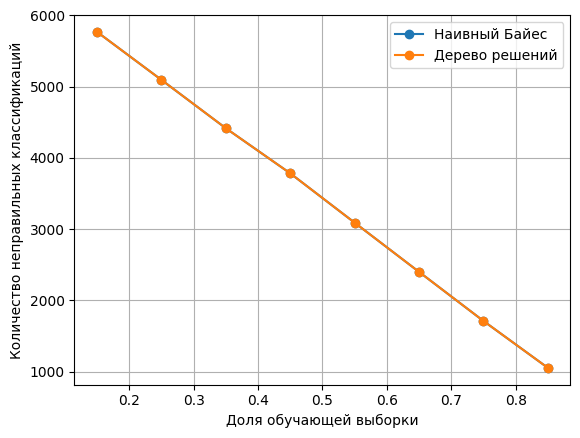

In [4]:
import matplotlib.pyplot as plt

proportions = [(0.85, 0.15), (0.75, 0.25), (0.65, 0.35), (0.55, 0.45), (0.45, 0.55), (0.35, 0.65), (0.25, 0.75), (0.15, 0.85)]
gnb_scores = []
dt_scores = []

for train_size, _ in proportions:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, random_state=10)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_valid)
    gnb_scores.append((y_valid != y_pred).sum())
    
    dt = DecisionTreeClassifier(random_state=10)
    dt.fit(X_train, y_train)
    y_pred = gnb.predict(X_valid)
    dt_scores.append((y_valid != y_pred).sum())

plt.plot([p[0] for p in proportions], gnb_scores, label='Наивный Байес', marker="o")
plt.plot([p[0] for p in proportions], dt_scores, label='Дерево решений', marker="o")
plt.xlabel('Доля обучающей выборки')
plt.ylabel('Количество неправильных классификаций')
plt.grid(True)
plt.legend()
plt.show()

Визуализация дерева решений с глубиной 3

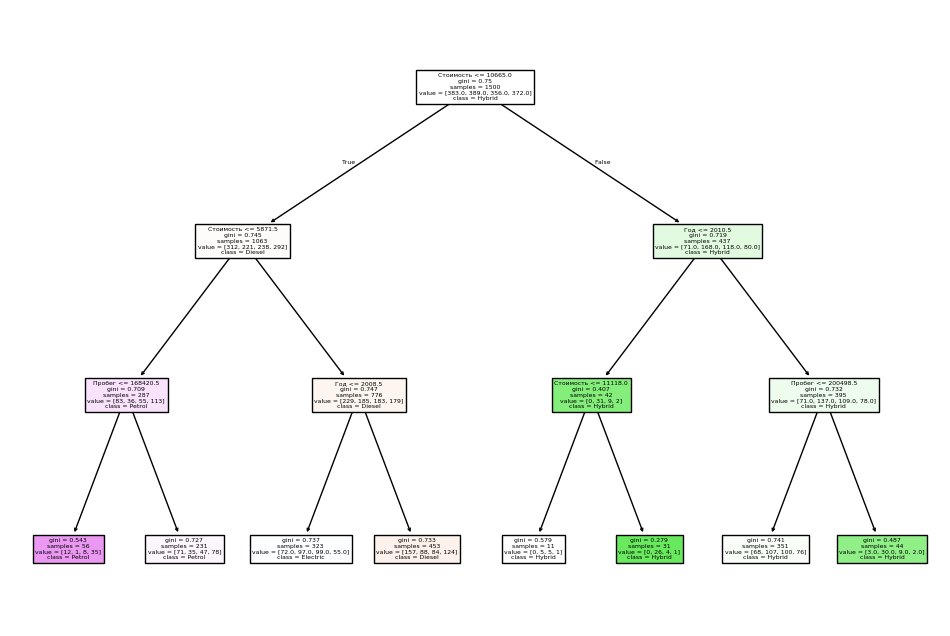

In [5]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3, random_state=10)
dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

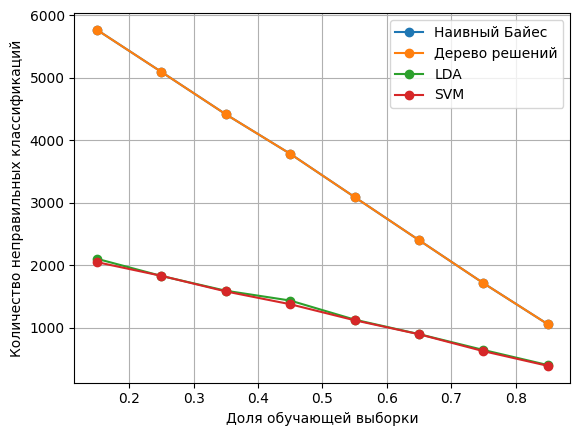

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import matplotlib.pyplot as plt

scaler = StandardScaler()

proportions = [(0.85, 0.15), (0.75, 0.25), (0.65, 0.35), (0.55, 0.45), (0.45, 0.55), (0.35, 0.65), (0.25, 0.75), (0.15, 0.85)]
gnb_scores = []
dt_scores = []
lda_scores = []
svm_scores = []

for train_size, _ in proportions:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, random_state=10)
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_valid)
    gnb_scores.append((y_valid != y_pred).sum())
    
    dt = DecisionTreeClassifier(random_state=10)
    dt.fit(X_train, y_train)
    y_pred = gnb.predict(X_valid)
    dt_scores.append((y_valid != y_pred).sum())

    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    lda_pred = lda.predict(X_valid)
    lda_scores.append((y_valid != lda_pred).sum())
    
    svm = SVC(kernel='linear', random_state=10)
    svm.fit(X_train_scaled, y_train)
    svm_pred = svm.predict(X_valid_scaled)
    svm_scores.append((y_valid != svm_pred).sum())

plt.plot([p[0] for p in proportions], gnb_scores, label='Наивный Байес', marker="o")
plt.plot([p[0] for p in proportions], dt_scores, label='Дерево решений', marker="o")
plt.plot([p[0] for p in proportions], lda_scores, label='LDA', marker="o")
plt.plot([p[0] for p in proportions], svm_scores, label='SVM', marker="o")
plt.xlabel('Доля обучающей выборки')
plt.ylabel('Количество неправильных классификаций')
plt.grid(True)
plt.legend()
plt.show()

Наивный байесовский метод применяется в различных областях, например:

Фильтрация спама. Алгоритм определяет, является ли электронное письмо спамом, на основе анализа слов и контекста.
Анализ настроений. Метод классифицирует текст как положительный, отрицательный или нейтральный на основе выбора слов, структуры предложения и контекста.
Классификация документов. Алгоритм выделяет документы по категориям (спорт, политика, технологии и др.) на основе частоты или присутствия определённых слов или функций.
Рекомендательные системы. Метод анализирует предпочтения пользователей, исторические данные и характеристики товаров, чтобы прогнозировать интересы при рекомендации продуктов, фильмов или статей.

Деревья решений применяются в различных областях, например:

Бизнес и финансы. Анализ инвестиционных проектов, оценка рисков и принятие стратегических решений.
Медицина. Диагностика заболеваний на основе симптомов и медицинских данных, выбор оптимального метода лечения.
Маркетинг. Определение целевых сегментов клиентов на основе их характеристик и предпочтений, оптимизация маркетинговых кампаний.
Машинное обучение. Построение моделей, которые классифицируют объекты на основе различных признаков, прогнозируют количественные значения, такие как цены или доходы.

ЛДА используется для решения задач классификации и распознавания образов, а также для сокращения размерности входных данных. 

Примеры
Распознавание лиц. В компьютеризированной системе каждое лицо представлено большим числом значений пикселей. ЛДА применяется для сокращения числа признаков перед классификацией. 
Биомедицинские исследования. Пациенты делятся на группы согласно тяжести болезни — лёгкая, средняя и тяжёлая формы. Затем изучаются результаты клинического и лабораторного анализов, чтобы обнаружить переменные, которые достаточно отличаются в изучаемых группах. На основе этих переменных строятся дискриминантные функции, которые помогают объективно классифицировать течение болезни у пациентов в будущем. 
Идентификация клиентов. На основе данных опроса определяются сегменты клиентов, которые с наибольшей вероятностью приобретут конкретный продукт.

Метод опорных векторов

Примеры задач
Классификация ирисов. SVM используется для разделения цветов на три вида на наборе данных, который включает признаки длины и ширины лепестков и чашелистиков.
Классификация спама и не спама в текстах. Метод применяется для работы с текстовыми данными, где нужно отделить один класс от другого в высокоразмерном пространстве признаков.
Прогнозирование состояния здоровья. SVM используется для предсказания, есть ли у человека заболевание сердца, на основе двух признаков — возраста и уровня холестерина.

Метод опорных векторов (SVM). Чаще всего используется для задач классификации. Основная идея — создание гиперплоскости, которая лучше всего разделяет классы в многомерном пространстве. SVM эффективен для высокоразмерных данных и способен обрабатывать нелинейные границы классов. Из минусов — может работать медленно на больших наборах данных.

Метод дерева решений. Используют как для задач классификации, так и для задач регрессии. Деревья решений просты для интерпретации, но могут быть подвержены переобучению, особенно если дерево становится слишком глубоким и сложным.

Линейный дискриминантный анализ (LDA). Метод ищет комбинации показателей, лучше всего разделяющие классы. Используется с целью сокращения размерности данных. LDA эффективен в случае, когда необходимо сократить количество признаков, не теряя информацию, которая важна для разделения на группы. Из минусов — не учитывает нелинейные границы разделения категорий.

Наивный байесовский классификатор. Метод основан на теореме Байеса для определения принадлежности объекта к какому-либо классу. Он предполагает независимость признаков, что часто не соответствует реальности, но всё равно может быть эффективным. Наивный байесовский классификатор часто используется из-за своей простоты и высокой скорости работы, но его точность снижается, если признаки данных оказываются зависимыми друг от друга.